# Importing Packages

In [283]:
import numpy as np
import pandas as pd
import re
import itertools
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

%matplotlib inline

In [284]:
# importing stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [285]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Loading the dataset

In [286]:
news_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [287]:
# printing the first 5 rows of the dataframe
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [288]:
test_dataset.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [289]:
# shape of the dataset
news_dataset.shape

(20800, 5)

In [290]:
# shape of test data
test_dataset.shape

(5200, 4)

In [291]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Therefore there are missing values present in our dataset in title, author and text column.

In [292]:
# checking missing value in test data
test_dataset.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [293]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna(' ')
test_dataset = test_dataset.fillna(' ')

In [294]:
# merging the author name, news title
news_dataset['content'] = news_dataset['author'] + ' ' + news_dataset['title']

In [295]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
5        Daniel Nussbaum Jackie Mason: Hollywood Would ...
6          Life: Life Of Luxury: Elton John’s 6 Favorit...
7        Alissa J. Rubin Benoît Hamon Wins French Socia...
8          Excerpts From a Draft Script for Donald Trum...
9        Megan Twohey and Scott Shane A Back-Channel Pl...
10       Aaron Klein Obama’s Organizing for Action Part...
11       Chris Tomlinson BBC Comedy Sketch "Real Housew...
12       Amando Flavio Russian Researchers Discover Sec...
13       Jason Ditz US Officials See No Link Between Tr...
14       AnotherAnnie Re: Yes, There Are Paid Governmen...
15       Jack Williams In Major League Soccer, Argentin...
16       Michael Corkery and Stacy Cowley Wells Fargo C.

So we will use this 'content' coloumn for building our model

In [296]:
# printing the first 5 rows of the dataset
news_dataset.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


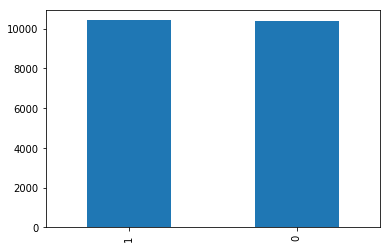

In [297]:
# Number of fake news and number of real news in our dataset
news_dataset['label'].value_counts().plot(kind = 'bar')    # bar graph

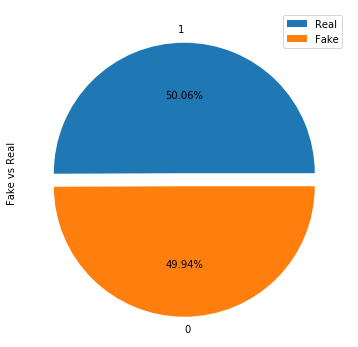

In [298]:
# Pie chart
news_dataset["label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.2f%%')
plt.ylabel("Fake vs Real")
plt.legend(["Real", "Fake"])
plt.show()

In [299]:
# separating the data and label
X = news_dataset.drop(columns = 'label', axis = 1)
Y = news_dataset['label']

In [300]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
5          5  Jackie Mason: Hollywood Would Love Trump if He...   
6          6  Life: Life Of Luxury: Elton John’s 6 Favorite ...   
7          7  Benoît Hamon Wins French Socialist Party’s Pre...   
8          8  Excerpts From a Draft Script for Donald Trump’...   
9          9  A Back-Channel Plan for Ukraine and Russia, Co...   
10        10  Obama’s Organizing for Action Partners with So...   
11        11  BBC Comedy Sketch "Real Housewives of ISIS" Ca...   
12        12  Russian Researchers Discover Secret Nazi Milit...   
13        13  US Officials See No Link Between Trump and Russi

In [301]:
print(Y)

0        1
1        0
2        1
3        1
4        1
5        0
6        1
7        0
8        0
9        0
10       0
11       0
12       1
13       1
14       1
15       0
16       0
17       1
18       1
19       0
20       1
21       0
22       0
23       1
24       0
25       1
26       0
27       1
28       0
29       0
        ..
20770    1
20771    1
20772    1
20773    1
20774    0
20775    1
20776    1
20777    1
20778    0
20779    0
20780    0
20781    1
20782    1
20783    0
20784    1
20785    0
20786    1
20787    0
20788    1
20789    0
20790    0
20791    1
20792    0
20793    1
20794    0
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64


# Data Cleaning and Pre-processing

Stemming -> Stemming is the process of reducing a word to its Root word.

example: actor, actress, acting --> act

In [302]:
port_stem = PorterStemmer()

In [303]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [304]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [305]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
5        daniel nussbaum jacki mason hollywood would lo...
6        life life luxuri elton john favorit shark pict...
7        alissa j rubin beno hamon win french socialist...
8        excerpt draft script donald trump q ampa black...
9        megan twohey scott shane back channel plan ukr...
10       aaron klein obama organ action partner soro li...
11       chri tomlinson bbc comedi sketch real housew i...
12       amando flavio russian research discov secret n...
13              jason ditz us offici see link trump russia
14       anotheranni ye paid govern troll social media ...
15       jack william major leagu soccer argentin find ...
16       michael corkeri staci cowley well fargo chief .

In [306]:
# separating fake news and real news
real_news = news_dataset[news_dataset["label"] == 0]["content"]
fake_news = news_dataset[news_dataset["label"] == 1]["content"]

In [307]:
fake_news

0        darrel lucu hous dem aid even see comey letter...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
6        life life luxuri elton john favorit shark pict...
12       amando flavio russian research discov secret n...
13              jason ditz us offici see link trump russia
14       anotheranni ye paid govern troll social media ...
17       starkman anonym donor pay million releas every...
18                                   doc fbi close hillari
20       news hope gop nude paul ryan emerg ayahuasca t...
23       massachusett cop wife bust pin fake home invas...
25       ira helfand nuke un histor treati ban nuclear ...
27       amanda shea humili hillari tri hide camera cau...
31       israel becom pivot china mid eastern calculu h...
36                greanfinish still danger zone januari th
37                                   b open thread u ele

In [308]:
real_news

1        daniel j flynn flynn hillari clinton big woman...
5        daniel nussbaum jacki mason hollywood would lo...
7        alissa j rubin beno hamon win french socialist...
8        excerpt draft script donald trump q ampa black...
9        megan twohey scott shane back channel plan ukr...
10       aaron klein obama organ action partner soro li...
11       chri tomlinson bbc comedi sketch real housew i...
15       jack william major leagu soccer argentin find ...
16       michael corkeri staci cowley well fargo chief ...
19       jeff poor chuck todd buzzfe donald trump polit...
21       jerom hudson monica lewinski clinton sex scand...
22       pam key rob reiner trump mental unstabl breitbart
24       donald g mcneil jr pam belluck abort pill orde...
26       aaron klein ali wake exclus islam state suppor...
28       jim dwyer andrea tantaro fox news claim retali...
29       mark landler hillari clinton becam hawk new yo...
30       ian hanchett chuck todd buzzfe eic publish fak.

In [309]:
# creating list of words which are used in fake news and list of words which are used in real news
fake_words = []
real_words = []

def extractSpamWords(fakeNews):
    global fake_words
    words = [word for word in nltk.word_tokenize(fakeNews)]
    fake_words = fake_words + words
    
def extractHamWords(realNews):
    global real_words
    words = [word for word in nltk.word_tokenize(realNews) ]
    real_words = real_words + words

fake_news.apply(extractSpamWords)
real_news.apply(extractHamWords)

1        None
5        None
7        None
8        None
9        None
10       None
11       None
15       None
16       None
19       None
21       None
22       None
24       None
26       None
28       None
29       None
30       None
32       None
33       None
34       None
35       None
38       None
39       None
40       None
42       None
44       None
45       None
48       None
49       None
52       None
         ... 
20730    None
20731    None
20733    None
20736    None
20738    None
20742    None
20743    None
20746    None
20747    None
20752    None
20753    None
20757    None
20759    None
20760    None
20765    None
20766    None
20774    None
20778    None
20779    None
20780    None
20783    None
20785    None
20787    None
20789    None
20790    None
20792    None
20794    None
20795    None
20796    None
20797    None
Name: content, Length: 10387, dtype: object

In [310]:
fake_words

['darrel',
 'lucu',
 'hous',
 'dem',
 'aid',
 'even',
 'see',
 'comey',
 'letter',
 'jason',
 'chaffetz',
 'tweet',
 'consortiumnew',
 'com',
 'truth',
 'might',
 'get',
 'fire',
 'jessica',
 'purkiss',
 'civilian',
 'kill',
 'singl',
 'us',
 'airstrik',
 'identifi',
 'howard',
 'portnoy',
 'iranian',
 'woman',
 'jail',
 'fiction',
 'unpublish',
 'stori',
 'woman',
 'stone',
 'death',
 'adulteri',
 'life',
 'life',
 'luxuri',
 'elton',
 'john',
 'favorit',
 'shark',
 'pictur',
 'stare',
 'long',
 'transcontinent',
 'flight',
 'amando',
 'flavio',
 'russian',
 'research',
 'discov',
 'secret',
 'nazi',
 'militari',
 'base',
 'treasur',
 'hunter',
 'arctic',
 'photo',
 'jason',
 'ditz',
 'us',
 'offici',
 'see',
 'link',
 'trump',
 'russia',
 'anotheranni',
 'ye',
 'paid',
 'govern',
 'troll',
 'social',
 'media',
 'blog',
 'forum',
 'websit',
 'starkman',
 'anonym',
 'donor',
 'pay',
 'million',
 'releas',
 'everyon',
 'arrest',
 'dakota',
 'access',
 'pipelin',
 'doc',
 'fbi',
 'close'

In [311]:
real_words

['daniel',
 'j',
 'flynn',
 'flynn',
 'hillari',
 'clinton',
 'big',
 'woman',
 'campu',
 'breitbart',
 'daniel',
 'nussbaum',
 'jacki',
 'mason',
 'hollywood',
 'would',
 'love',
 'trump',
 'bomb',
 'north',
 'korea',
 'lack',
 'tran',
 'bathroom',
 'exclus',
 'video',
 'breitbart',
 'alissa',
 'j',
 'rubin',
 'beno',
 'hamon',
 'win',
 'french',
 'socialist',
 'parti',
 'presidenti',
 'nomin',
 'new',
 'york',
 'time',
 'excerpt',
 'draft',
 'script',
 'donald',
 'trump',
 'q',
 'ampa',
 'black',
 'church',
 'pastor',
 'new',
 'york',
 'time',
 'megan',
 'twohey',
 'scott',
 'shane',
 'back',
 'channel',
 'plan',
 'ukrain',
 'russia',
 'courtesi',
 'trump',
 'associ',
 'new',
 'york',
 'time',
 'aaron',
 'klein',
 'obama',
 'organ',
 'action',
 'partner',
 'soro',
 'link',
 'indivis',
 'disrupt',
 'trump',
 'agenda',
 'chri',
 'tomlinson',
 'bbc',
 'comedi',
 'sketch',
 'real',
 'housew',
 'isi',
 'caus',
 'outrag',
 'jack',
 'william',
 'major',
 'leagu',
 'soccer',
 'argentin',
 'f

# Visualization

In [313]:
from wordcloud import WordCloud

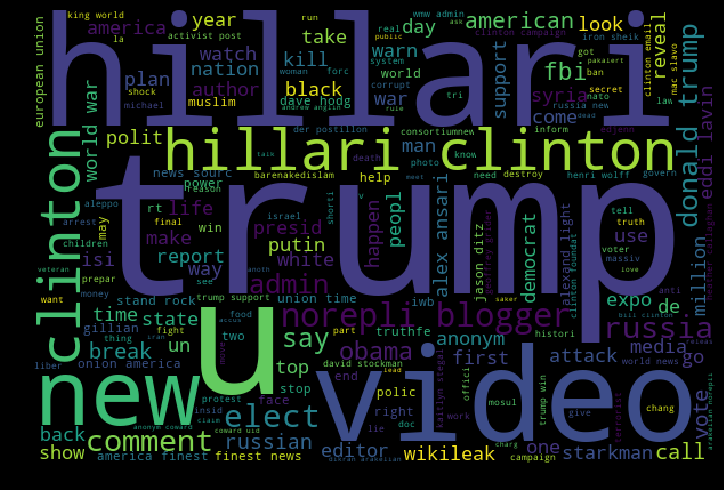

In [314]:
# Wordcloud of Fake words
fake_wordcloud = WordCloud(width=600, height=400).generate(" ".join(fake_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(fake_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

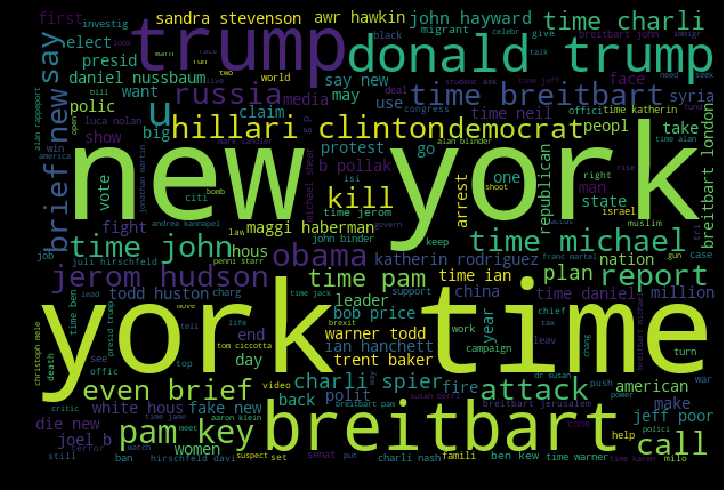

In [315]:
# Wordcloud of Real words
real_wordcloud = WordCloud(width=600, height=400).generate(" ".join(real_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(real_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [316]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [317]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [318]:
print(Y)

[1 0 1 ... 0 1 1]


In [319]:
Y.shape

(20800,)

# Creating Bag of Words model

In [320]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [321]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Splitting the dataset to training & test data

In [322]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

# Training the Model: Logistic Regression

In [323]:
model = LogisticRegression()

In [324]:
model.fit(X_train, Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# Evaluation

In [325]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [326]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9865985576923076


In [327]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [328]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9790865384615385


# Training the model: Naive Bayes Model

Using Naive Bayes Classification techniques for predicting our model. Since Naive Bayes works very well for NLP problems

In [329]:
#import Naive Bayes algo from scikit learn
from sklearn.naive_bayes import MultinomialNB  # mulinomialNB works for multiple classes as well

In [330]:
naiveBayes_model = MultinomialNB().fit(X_train, Y_train)

In [331]:
# Now predict for test data
y_pred = naiveBayes_model.predict(X_test)

In [332]:
print(y_pred)

[1 0 1 ... 1 1 0]


# Evaluation of Naive Bayes

In [333]:
# Check accuracy of model using accuracy score
accuracy = accuracy_score(Y_test, y_pred)

In [334]:
accuracy

0.9550480769230769

it shows that our model is 95% accurate

# Predictions

In [335]:
X_new = X_test[3]

prediction = naiveBayes_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[0]
The news is Real


In [336]:
# checking model for some random news
news=['Four ways Bob Corker skewered Donald Trump']
news_count = vectorizer.transform(news)

In [337]:
pred = naiveBayes_model.predict(news_count)

if (pred[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

The news is Real
